In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

We are checking how the buffer size affects performance.

In [2]:
# A function which can sort dataframes in a list of a dataframes. Based on bubble sort.
def sort_dataframe(dataframes: list, key: str):
    swapped = True
    while (swapped):
        swapped = False
        for i in range(len(dataframes)-1):
            # dataframes[i] gives us the ith dataframe, dataframes[i][key] gives us the right column and 
            # dataframes[i][key][0] gives us the first element of that column. We can do this because 
            # key should be equal for the whole column.
            a = dataframes[i][key][0]
            b = dataframes[i+1][key][0]
            if a > b:
                temp = dataframes[i]
                dataframes[i] = dataframes[i+1]
                dataframes[i+1] = temp
                swapped = True

In [3]:
# We load data
buffered_files = glob.glob(path.join("..", "cpp", "uni-machine", "v0.1.11", "buffered", "*.csv"))
dfs_buffered = [pd.read_csv(f) for f in buffered_files]

In [4]:
# We sort the data
sort_dataframe(dfs_buffered, "buffer")

In [5]:
# We calculate runtime per integer
for df in dfs_buffered:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

Text(0.5, 1.0, 'Comapring buffered_fisher_yates')

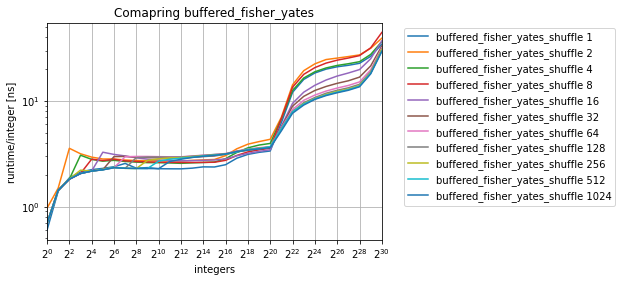

In [8]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [1 * i for i in range(0, 10, 1)]

ax = dfs_buffered[0].plot(x="integers", y="runtime/integer [ns]", label=dfs_buffered[0]["function"][0] + " " + str(dfs_buffered[0]["buffer"][0]))
for i in range(1, len(dfs_buffered)):
    dfs_buffered[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buffered[i]["function"][0] + " " + str(dfs_buffered[i]["buffer"][0]))

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**0, 2**30)
# ax.set_ylim(0, 5 * 2)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comapring buffered_fisher_yates")

Text(0.5, 0.98, 'Comapring buffered_fisher_yates')

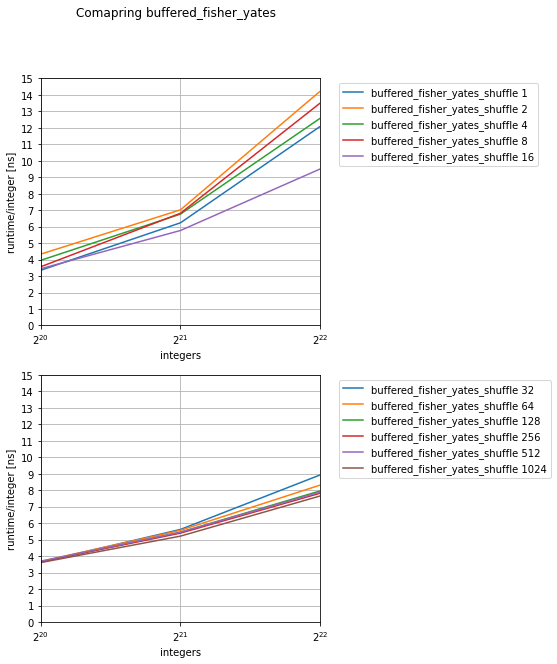

In [23]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 1)]
ax_yticks = [1 * i for i in range(0, 100, 1)]

half = int(len(dfs_buffered)/2)

fig, axes = plt.subplots(2, figsize=(5,10))

for i in range(0, half):
    dfs_buffered[i].plot(ax=axes[0], x="integers", y="runtime/integer [ns]", label=dfs_buffered[i]["function"][0] + " " + str(dfs_buffered[i]["buffer"][0]))

for i in range(half, len(dfs_buffered)):
    dfs_buffered[i].plot(ax=axes[1], x="integers", y="runtime/integer [ns]", label=dfs_buffered[i]["function"][0] + " " + str(dfs_buffered[i]["buffer"][0]))

for i in range(2):
    ax = axes[i]
    ax.set_xscale("log", base=2)
    # ax.set_yscale("log", base=10)
    ax.set_xticks(ax_xticks)
    ax.set_yticks(ax_yticks)
    ax.set_xlim(2**20, 2**22)
    ax.set_ylim(0, 15)
    ax.grid(True)
    ax.set_xlabel("integers")
    ax.set_ylabel("runtime/integer [ns]")
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig.suptitle("Comapring buffered_fisher_yates")

Lets compare some of this with the others

In [24]:
# Lets compare the other ones
df_std_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-020409-nb=0-bf=0-th=0-cpp.csv"))
df_fy_shuffle_32 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-021932-nb=0-bf=0-th=0-cpp.csv"))

In [25]:
df_std_shuffle["runtime/integer [ns]"] = (df_std_shuffle["total_runtime"] / df_std_shuffle["total_runs"]) / df_std_shuffle["integers"]
df_fy_shuffle_32["runtime/integer [ns]"] = (df_fy_shuffle_32["total_runtime"] / df_fy_shuffle_32["total_runs"]) / df_fy_shuffle_32["integers"]

Text(0.5, 1.0, 'Comapring some shhuffle algorithms for base case')

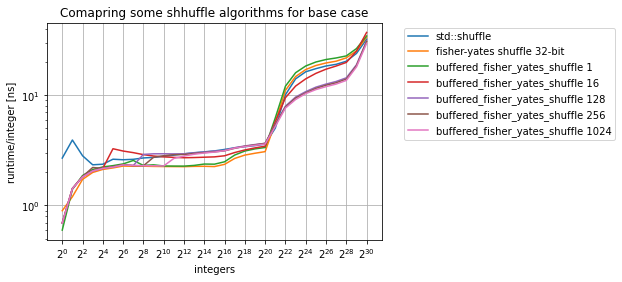

In [29]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [1 * i for i in range(0, 50, 1)]

ax = df_std_shuffle.plot(x="integers", y="runtime/integer [ns]", label="std::shuffle")
df_fy_shuffle_32.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="fisher-yates shuffle 32-bit")
dfs_buffered[0].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buffered[0]["function"][0] + " " + str(dfs_buffered[0]["buffer"][0]))
dfs_buffered[4].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buffered[8]["function"][4] + " " + str(dfs_buffered[4]["buffer"][0]))
dfs_buffered[7].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buffered[8]["function"][7] + " " + str(dfs_buffered[7]["buffer"][0]))
dfs_buffered[8].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buffered[8]["function"][0] + " " + str(dfs_buffered[8]["buffer"][0]))
dfs_buffered[10].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buffered[10]["function"][0] + " " + str(dfs_buffered[10]["buffer"][0]))

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
# ax.set_xlim(2**20, 2**22)
# ax.set_ylim(0, 50)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comapring some shhuffle algorithms for base case")